<a href="https://colab.research.google.com/github/Abhijeet-sah/Cognifyz-Technologies-Internship-Level1-Task2/blob/main/Level1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍴 Restaurant Dataset Analysis  
**Author:** Abhijeet Sah  

This notebook explores a restaurant dataset to:  
1. Calculate **basic statistical measures** (mean, median, std, etc.) for numerical columns  
2. Explore **distribution of categorical variables** (Country, City, Cuisines)  
3. Identify **top cuisines & cities** with the most restaurants  
4. Create **visualizations** for insights

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

Load Dataset

In [2]:
file_path = "/content/Dataset .csv"
df = pd.read_csv(file_path)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Data Cleaning

In [16]:
# Fill missing cuisines
df['Cuisines'] = df['Cuisines'].fillna("Unknown")

# Remove unrealistic outliers in cost
df = df[df['Average Cost for two'] < 50000]

print("Data cleaned successfully")

Data cleaned successfully


Basic Statistics

In [4]:
# Numerical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9530.0,9.045516e+06,8.796831e+06,53.000000,301919.000000,6.000896e+06,1.835228e+07,1.850065e+07
Country Code,9530.0,1.819895e+01,5.670174e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9530.0,6.404365e+01,4.146128e+01,-157.948486,77.081262,7.719178e+01,7.728136e+01,1.748321e+02
Latitude,9530.0,2.592453e+01,1.091784e+01,-41.330428,28.479785,2.857069e+01,2.864281e+01,5.597698e+01
Average Cost for two,9530.0,5.822311e+02,6.020171e+02,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+03
Price range,9530.0,1.802308e+00,9.049455e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9530.0,2.662781e+00,1.515989e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9530.0,1.555541e+02,4.287309e+02,0.000000,5.000000,3.050000e+01,1.290000e+02,1.093400e+04


In [5]:
# Median values explicitly
df.median(numeric_only=True)

,0
Restaurant ID,6.000896e+06
Country Code,1.000000e+00
Longitude,7.719178e+01
Latitude,2.857069e+01
Average Cost for two,4.000000e+02
Price range,2.000000e+00
Aggregate rating,3.200000e+00
Votes,3.050000e+01


Country Mapping

In [6]:
country_map = {
    1: "India", 14: "Australia", 30: "Brazil", 37: "Canada",
    94: "Indonesia", 148: "New Zealand", 162: "Philippines",
    166: "Qatar", 184: "Singapore", 189: "South Africa",
    191: "Sri Lanka", 208: "Turkey", 214: "UAE",
    215: "United Kingdom", 216: "United States"
}
df['Country'] = df['Country Code'].map(country_map)

df['Country'].value_counts().head(10)


,count
Country,
India,8652
United States,434
United Kingdom,80
UAE,60
South Africa,60
Brazil,60
New Zealand,40
Turkey,34
Australia,24


Top Categories

In [7]:
# Top Cities
df['City'].value_counts().head(10)

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Guwahati,21
Amritsar,21
Ahmedabad,21
Lucknow,21


In [8]:
# Top Cuisines
df['Cuisines'].value_counts().head(10)

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


Visualizations

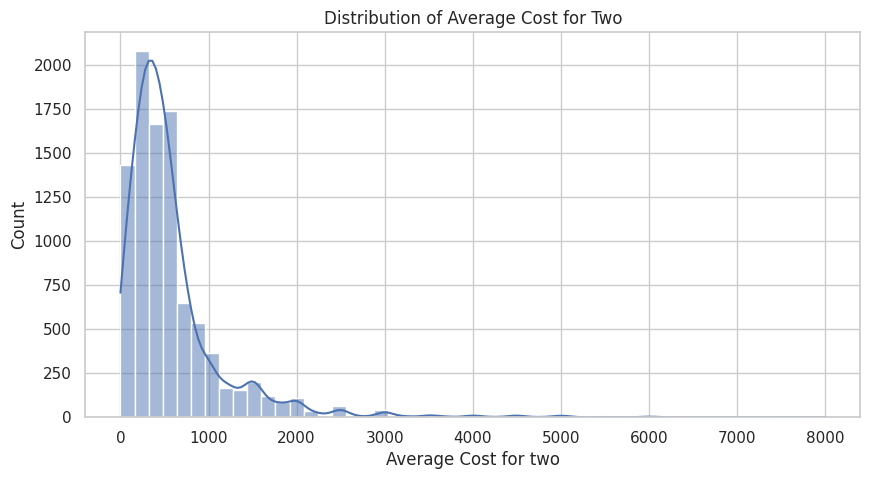

In [9]:
# Average Cost Distribution
sns.histplot(df['Average Cost for two'], bins=50, kde=True)
plt.title("Distribution of Average Cost for Two")
plt.show()

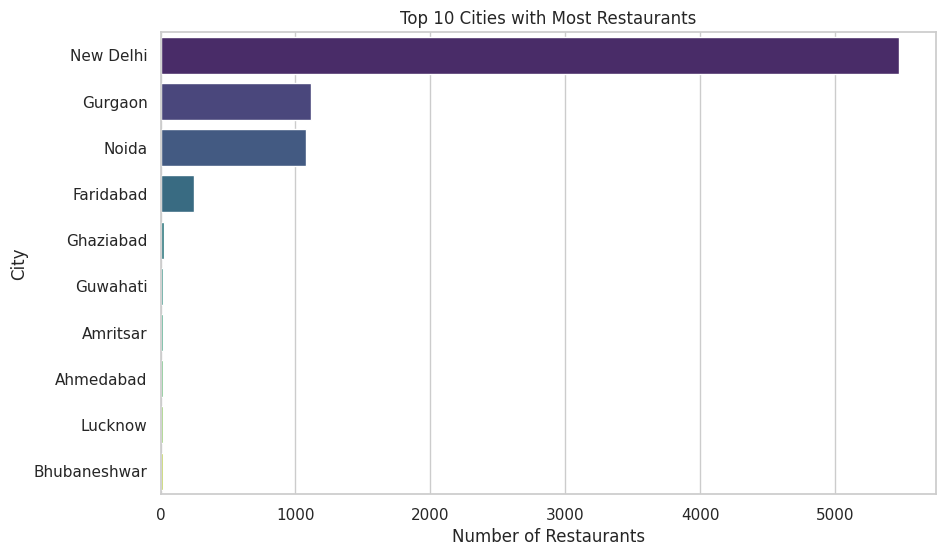

In [11]:
# Top 10 Cities by Restaurant Count
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    hue=top_cities.index,
    dodge=False,
    legend=False,
    palette="viridis"
)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

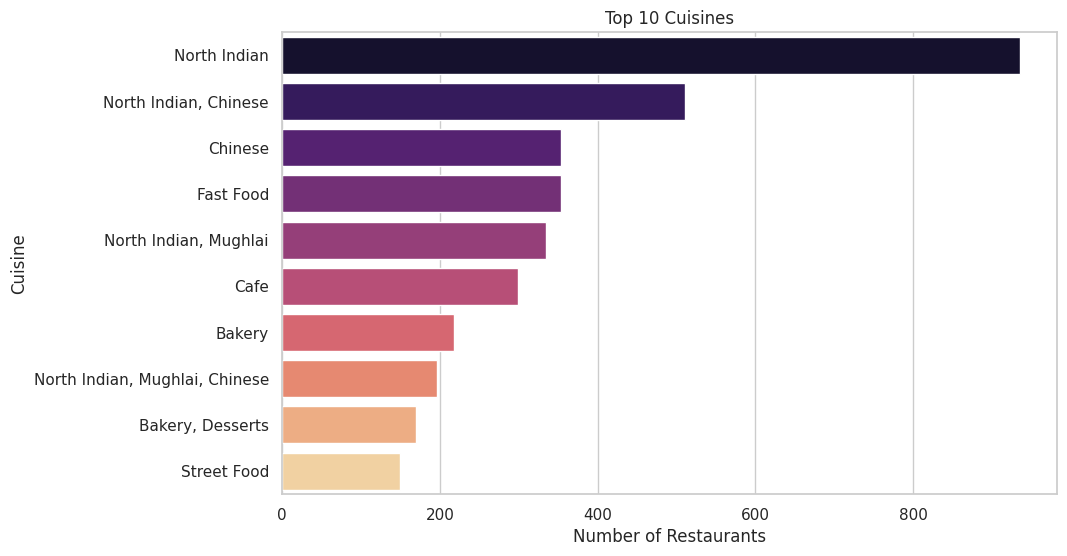

In [12]:
# Top 10 Cuisines by Restaurant Count
cuisine_counts = df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=cuisine_counts.values,
    y=cuisine_counts.index,
    hue=cuisine_counts.index,
    dodge=False,
    legend=False,
    palette="magma"
)
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

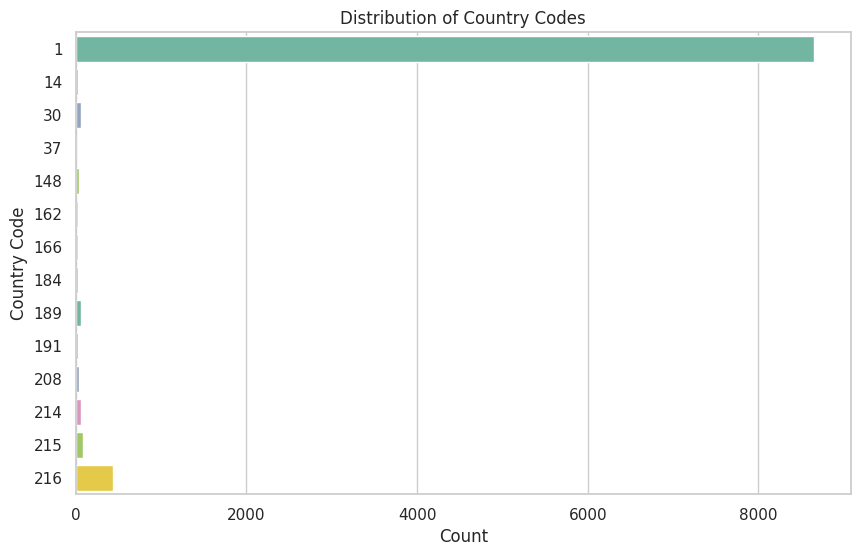

In [13]:
# Country Code Distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='Country Code',
    hue='Country Code',
    legend=False,
    palette="Set2"
)
plt.title("Distribution of Country Codes")
plt.xlabel("Count")
plt.ylabel("Country Code")
plt.show()

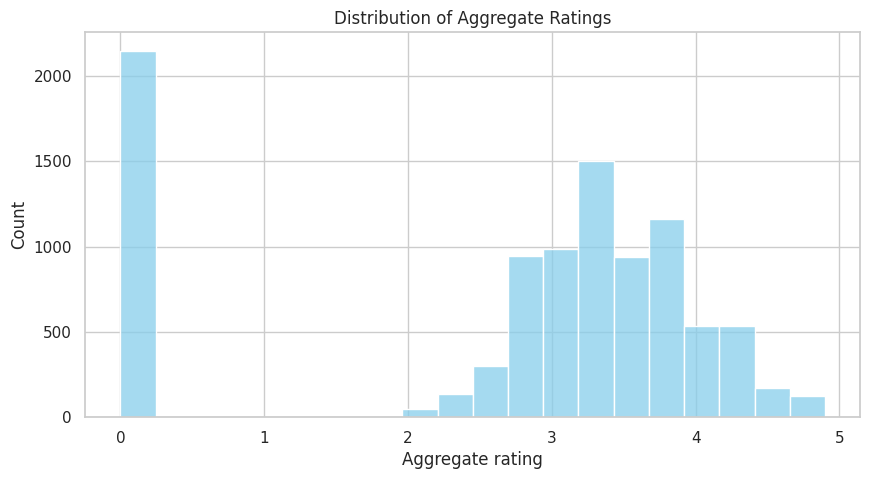

In [14]:
# Aggregate Rating Distribution
sns.histplot(df['Aggregate rating'], bins=20, kde=False, color="skyblue")
plt.title("Distribution of Aggregate Ratings")
plt.show()

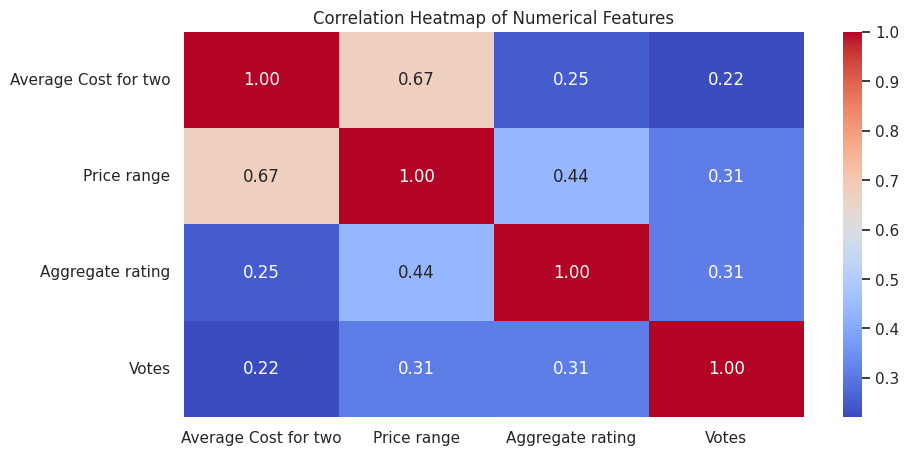

In [15]:
# Correlation Heatmap
sns.heatmap(df[['Average Cost for two','Price range','Aggregate rating','Votes']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## 📌 Conclusion
- **India** dominates the dataset with the highest number of restaurants  
- **New Delhi** has the most restaurants among all cities  
- **North Indian cuisine** is the most popular  
- Cost distribution is highly skewed with a few very expensive outliers  
- Ratings are centered around **3.0 – 4.0**, showing average restaurant quality  

This project successfully covers all required tasks:  
✔ Basic statistics  
✔ Distribution of categorical variables  
✔ Top cuisines & cities  
✔ Visual insights  